In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2  #import the openCV package
imagePath = r"C:\Users\mobin\Desktop\desktop_img.jpg"

In [3]:
img = cv2.imread(imagePath)   # read the image

In [4]:
img.shape

(3264, 1836, 3)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       #Convert the image to Grayscale

In [6]:
gray_image.shape

(3264, 1836)

###### Load the classifier

In [7]:
face_classifier =cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

##### Perform the Face Detection

In [8]:
face = face_classifier.detectMultiScale(gray_image, scaleFactor= 1.1, minNeighbors=5, minSize=(40,40))

##### Drawing a Bounding Box

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),4)

##### Displaying the image (first convert the image from the BGR format to RGB)

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1835.5, 3263.5, -0.5)

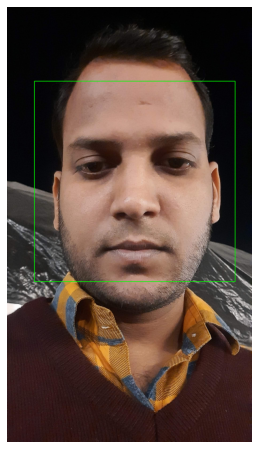

In [11]:
# Now import matplotlib library
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.axis("off")

#### Now Real-Time Face Detection with OpenCV


###### Access the Webcam

In [12]:
video_capture = cv2.VideoCapture(0)

##### Identifying Faces in the Video Stream

In [13]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40,40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x,y), (x+w, y+h), (0,255,0),4)
    return faces

##### Creating a Loop for Real-Time Face Detection

In [14]:
while True:
    result, video_frame = video_capture.read()   #read frames from the video
    if result is False:
        break    # terminate the loop if the frame is not read successfully
    
    faces = detect_bounding_box(video_frame)  #apply the function we created to the video frame
    
    cv2.imshow(
        "My Face Detection Project", video_frame)  # display the processed frame in a window named "My Face Detection Project"
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
video_capture.release()
cv2.destroyALLWindows()

AttributeError: module 'cv2' has no attribute 'destroyALLWindows'